<a href="https://colab.research.google.com/github/abolfazl328/CIFAR_10_classification/blob/main/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading tensorflow and keras and other appropriate libraries:


In [ ]:
from tensorflow import keras

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

Loading Cifar-10 dataset from keras datasets and separate test and train datas:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Define the class names of the dataset labels:

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Plot the first 20 images along with their labels:

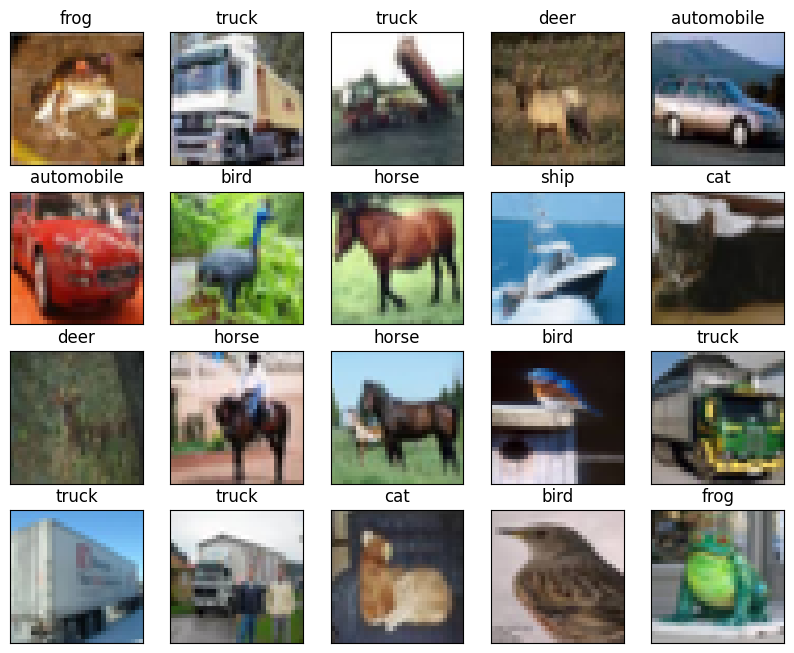

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[(train_labels[i][0])])
    plt.xticks([])
    plt.yticks([])
plt.show()

Printing the shape of the train and test images:

In [ ]:
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


Plot an image figure of the train images for better illustration:

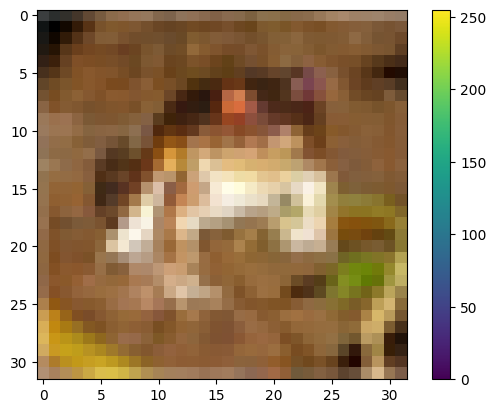

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Scaling the images of the dataset to a range of 0 to 1:

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = tf.one_hot(tf.squeeze(train_labels), depth=10)
test_labels = tf.one_hot(tf.squeeze(test_labels), depth=10)

In [ ]:
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


Importing appropriate tools for modeling our neural network:

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D

Modeling a convolutional neural network:

In [64]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Compile the model:

In [65]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Early stopping callback:

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [67]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)


In [68]:
early_stopping = EarlyStopping(
    monitor='val_loss',    # stop when validation loss stops improving
    patience=5,            # wait 5 epochs before stopping
    restore_best_weights=True  # restore weights from the best epoch
)

Training the model by fitting it to the train data:

In [81]:
history = model.fit(
    train_images, train_labels,
    epochs=50,               # set a high max epoch count
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr]  # use the early stopping callback
)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.3448 - loss: 1.7724 - val_accuracy: 0.5410 - val_loss: 1.2855 - learning_rate: 0.0010
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.5801 - loss: 1.1873 - val_accuracy: 0.5778 - val_loss: 1.2617 - learning_rate: 0.0010
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6420 - loss: 1.0256 - val_accuracy: 0.6740 - val_loss: 0.9244 - learning_rate: 0.0010
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6894 - loss: 0.8982 - val_accuracy: 0.6946 - val_loss: 0.8690 - learning_rate: 0.0010
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7157 - loss: 0.8274 - val_accuracy: 0.7444 - val_loss: 0.7448 - learning_rate: 0.0010
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7417 - loss: 0.7626 - val_accuracy: 0.7198 - val_loss: 0.8226 - learning_rate: 0.0010
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7611 - loss: 0.70

Evaluate the model with the test data:

In [82]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.8535 - loss: 0.4951
Test accuracy: 0.8535000085830688


Loss plot:

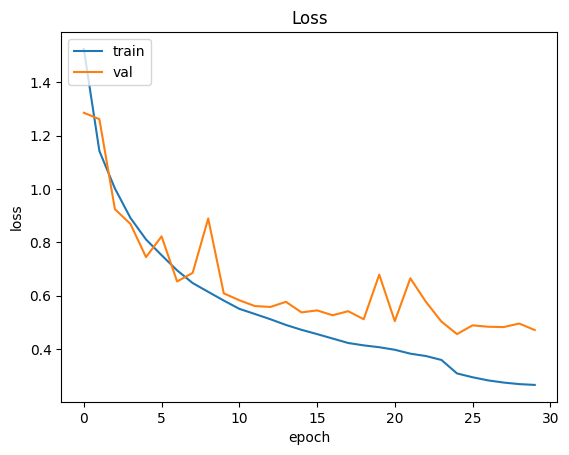

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Accuracy plot:

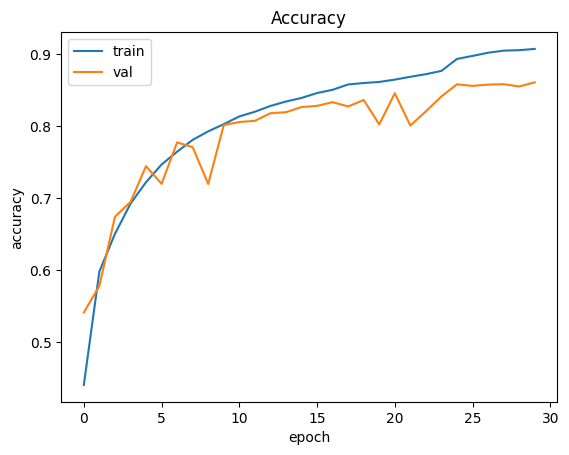

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Extracting classification report:

In [85]:
from sklearn.metrics import classification_report

In [86]:
y_pred_probs = model.predict(test_images)
y_true = np.argmax(test_labels.numpy(), axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [87]:
report = classification_report(
    y_true,
    y_pred,
    target_names=[
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]
)

print("\n📊 Classification Report:\n")
print(report)


📊 Classification Report:

              precision    recall  f1-score   support

    airplane       0.86      0.87      0.86      1000
  automobile       0.94      0.93      0.94      1000
        bird       0.83      0.76      0.80      1000
         cat       0.78      0.66      0.71      1000
        deer       0.77      0.88      0.82      1000
         dog       0.81      0.77      0.79      1000
        frog       0.86      0.91      0.88      1000
       horse       0.86      0.91      0.88      1000
        ship       0.90      0.93      0.92      1000
       truck       0.92      0.91      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Now test your neural network by yourself:

In [88]:
from PIL import Image
import os

In [89]:
image_folder = './'
true_labels = ['airplane', 'automobile', 'cat', 'dog']
image_files = ['airplane.jpg', 'car.jpg', 'cat.jpg', 'dog.jpg']

In [90]:
def load_and_preprocess_image(path):
    img = Image.open(path).convert('RGB')
    img = img.resize((32, 32))
    img_array = np.array(img).astype('float32') / 255.0
    return img_array

In [91]:
images = np.array([
    load_and_preprocess_image(os.path.join(image_folder, file))
    for file in image_files
])

In [92]:
pred_probs = model.predict(images)
pred_classes = np.argmax(pred_probs, axis=1)
true_class_indices = [class_names.index(label) for label in true_labels]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


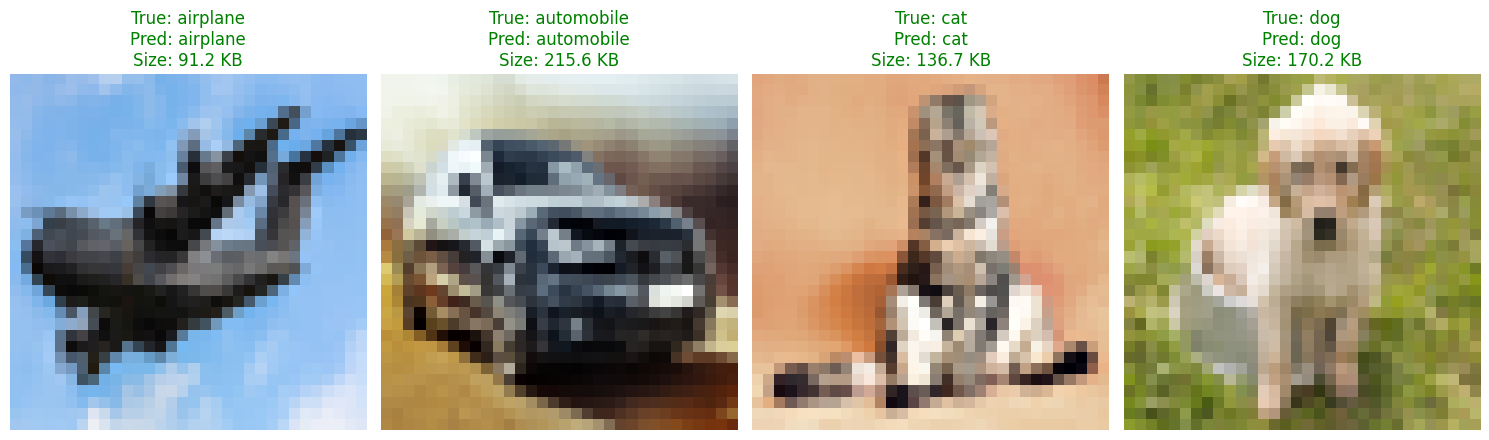

In [93]:
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

    # Title with prediction vs. true class
    pred_label = class_names[pred_classes[i]]
    true_label = true_labels[i]
    is_correct = pred_label == true_label
    color = 'green' if is_correct else 'red'

    # Get JPEG compression ratio
    jpeg_path = os.path.join(image_folder, image_files[i])
    file_size_kb = os.path.getsize(jpeg_path) / 1024

    plt.title(f"True: {true_label}\nPred: {pred_label}\nSize: {file_size_kb:.1f} KB", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()